# Comparison of Models

Throughout our modelling, we explored several performance metrics. Since the data was unbalanced, we used the ROC curve instead of the accuracy. This is because the ROC curve illustrates the tradeoff between the sensitivity and specificity and this was of greater importance in the unbalanced setting.


REMEMBER (FROM ASSESSMENT GUIDANCE:)
Half of the effort should be devoted to exploring appropriate performance
measures. Think about the circumstances by which your chosen performance
metric will lead to real-world generalisability, and how it might compromise
this for the purpose of standardization. Demonstrate this with data and/or
simulation; for example, if you believe that you can predict new types of data,
you could demonstrate this by leaving out some types of data and observing
your performance. Examine in what sense your group’s best method is truly
best.

Checklist:
- Explore performance measures - CHECK because we have all done this - looking at ROC curves, confusion matrices etc
- Demonstrate generalisability with data - CHECK because we have all done this. We found predictions on the test set and found the ROC curve.
- Examine in what sense your group's best method is the best - IN PROGRESS. I have gotten a start on this by loading the LDA and RF results. I have plotted the predictions. We still need logistic, and after that we can do a write-up. We should also do a discussion on each of our methods. Perhaps we provide a condensed version of our individual discussions (5.4 and 4.3 condensed here?)


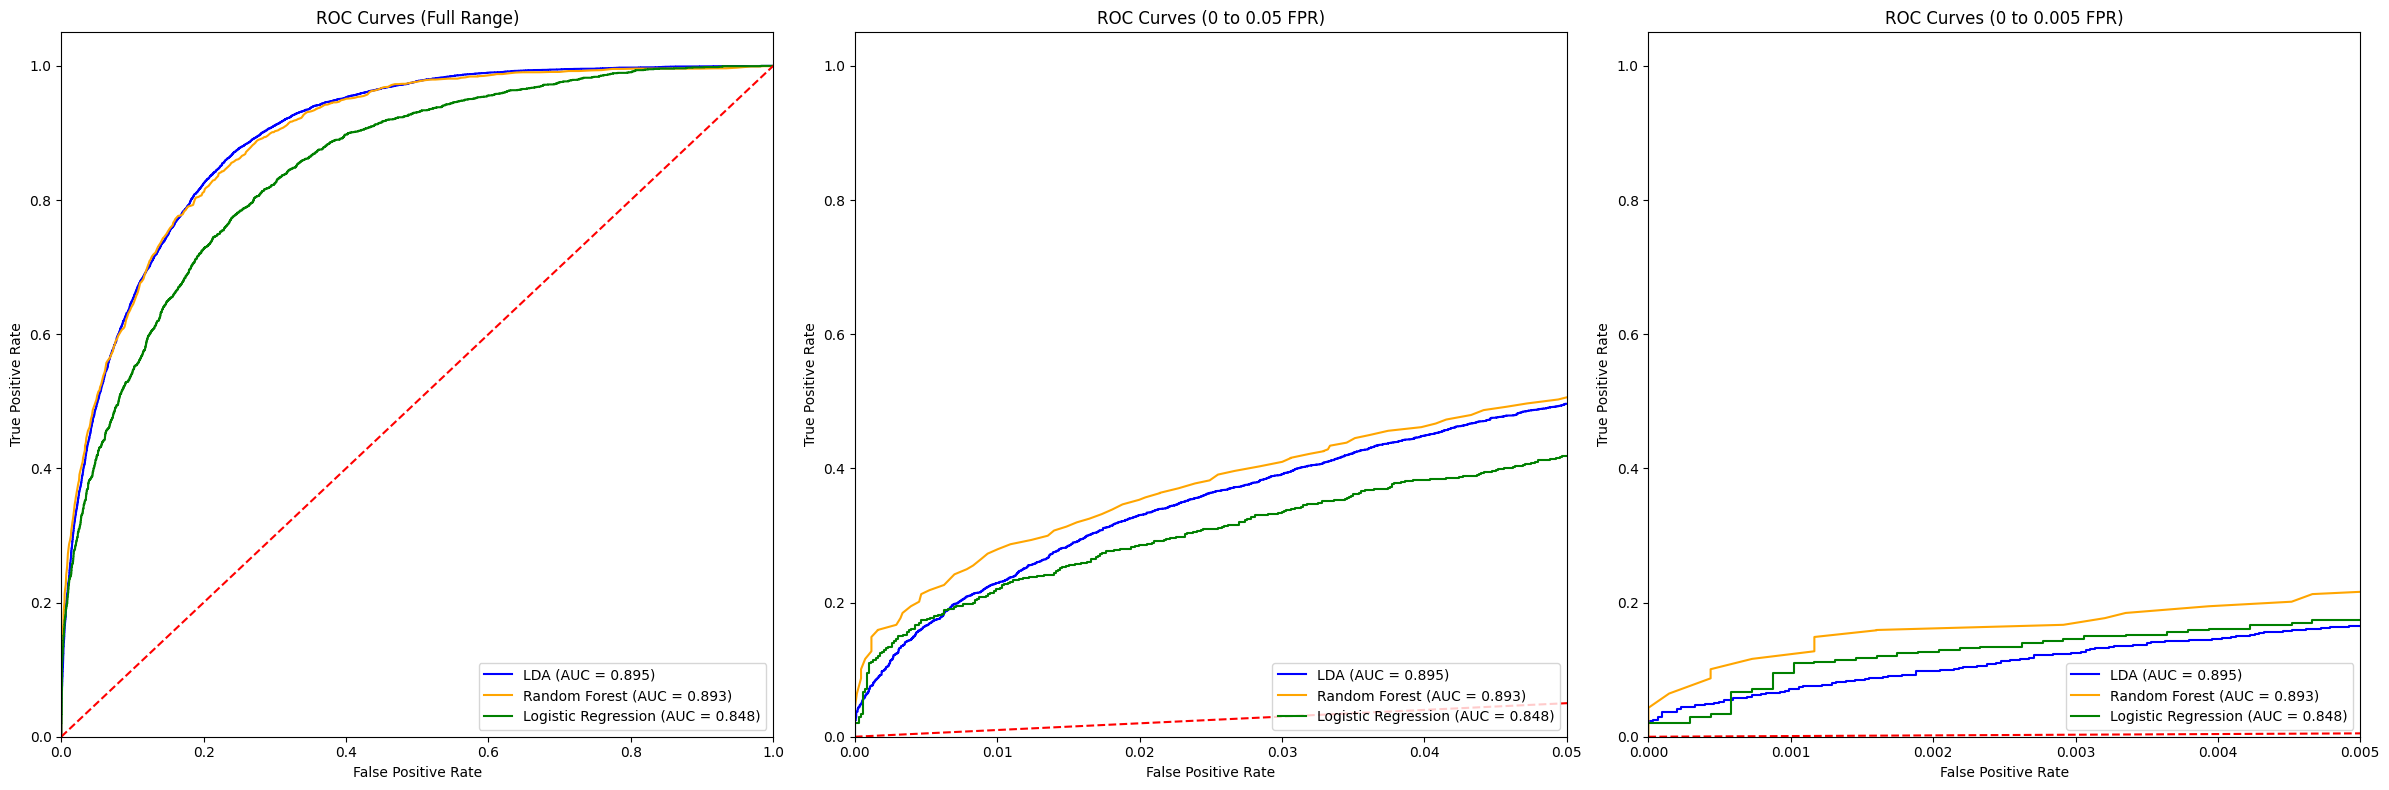

In [4]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Load ROC data for LDA, Random Forest, and Logistic Regression
with open("pickle/LDA_roc_data.pkl", 'rb') as file:
    lda_roc_data = pickle.load(file)
with open("pickle/rf_roc_data.pkl", 'rb') as file:
    rf_roc_data = pickle.load(file)
with open("pickle/logit_roc_data.pkl", 'rb') as file:
    logit_roc_data = pickle.load(file)

# Define a function to plot ROC curves on specified axis and x-axis range
def plot_roc(ax, xlim, title):
    ax.plot(lda_roc_data['fpr_lda'], lda_roc_data['tpr_lda'], color='blue', 
            label=f'LDA (AUC = {lda_roc_data["roc_auc_lda"]:.3f})')
    ax.plot(rf_roc_data['fpr'], rf_roc_data['tpr'], color='orange', 
            label=f'Random Forest (AUC = {rf_roc_data["roc_auc"]:.3f})')
    ax.plot(logit_roc_data['fpr'], logit_roc_data['tpr'], color='green', 
            label=f'Logistic Regression (AUC = {logit_roc_data["roc_auc"]:.3f})')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing diagonal
    ax.set_xlim(xlim)
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')
    ax.grid(False)

# Create subplots: full range, small range (0-0.05), very small range (0-0.005)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Plot using the helper function for different x-axis ranges
plot_roc(ax1, [0.0, 1.0], 'ROC Curves (Full Range)')
plot_roc(ax2, [0.0, 0.05], 'ROC Curves (0 to 0.05 FPR)')
plot_roc(ax3, [0.0, 0.005], 'ROC Curves (0 to 0.005 FPR)')

# Show the plots
plt.tight_layout()
plt.show()


From these plots we observe that:
- The AUC values are relatively high for all three methods. However, LDA and random forest have the highest AUC at 0.895 and 0.893 respectively. Since we have chosen to use the ROC curve as a performance metric, we conclude that the 
- At lower FPR ranges (from 0 to 0.05), the random forest dominates the LDA classifier. 

To inspect our chosen question of looking at the variation of income by sex, we now look at the actual and predicted income by sex. 

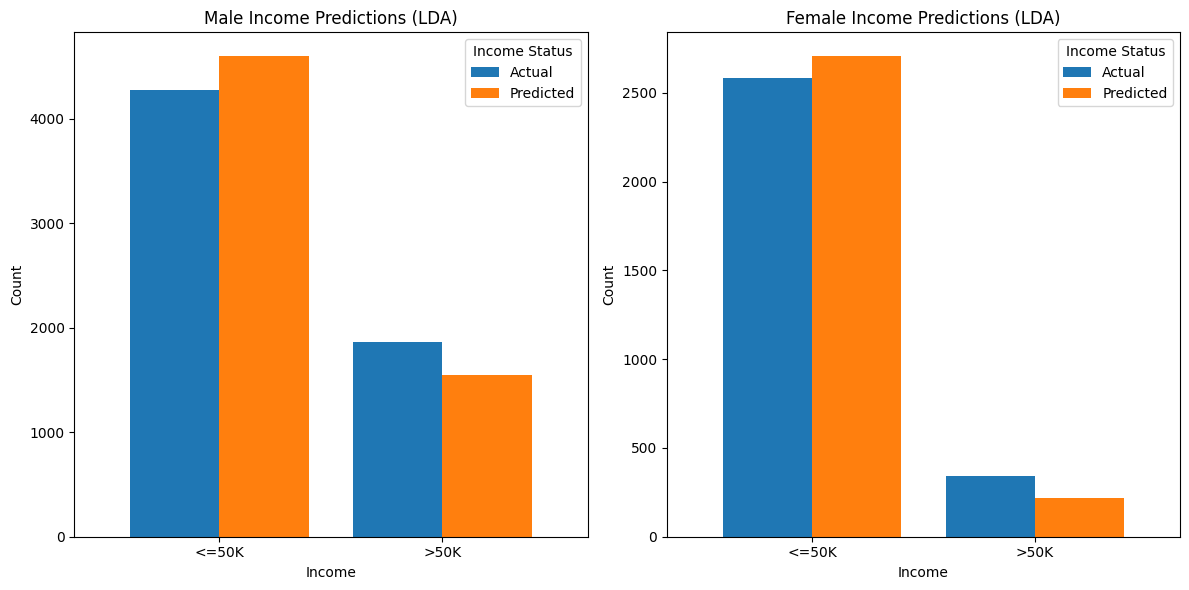

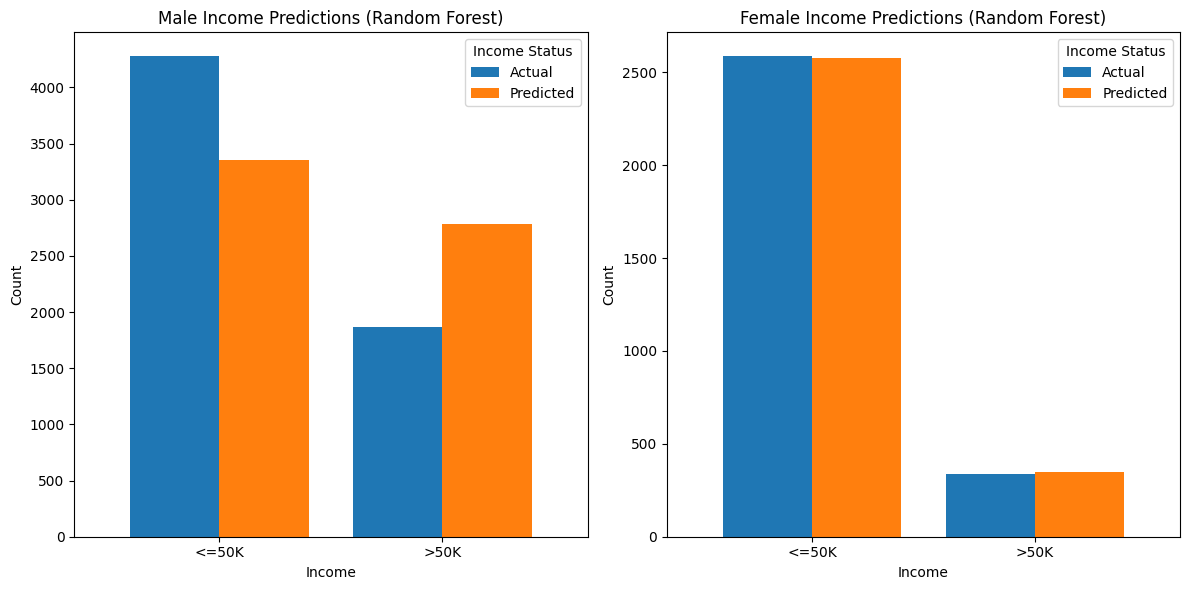

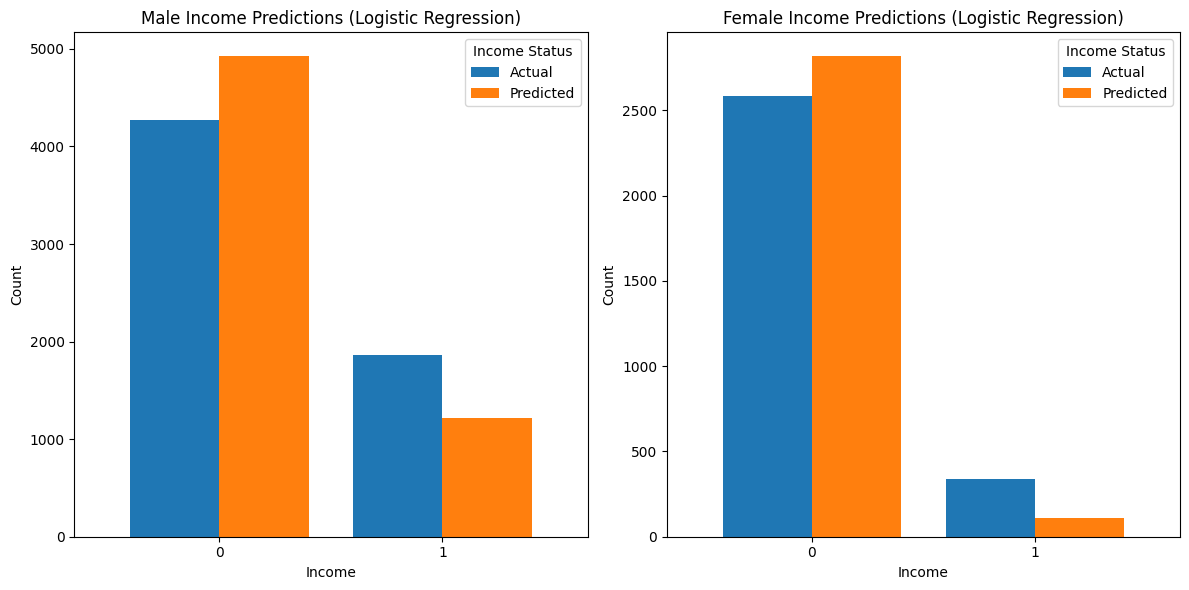

In [5]:
def plot_income_predictions(results_df, model_name):
    # Filter for males and females
    male_df = results_df[results_df['Sex'] == 'Male']
    female_df = results_df[results_df['Sex'] == 'Female']

    # Count occurrences for males
    male_actual_counts = male_df['Actual Income'].value_counts()
    male_predicted_counts = male_df['Predicted Income'].value_counts()

    # Count occurrences for females
    female_actual_counts = female_df['Actual Income'].value_counts()
    female_predicted_counts = female_df['Predicted Income'].value_counts()

    # Create a DataFrame to hold counts for males
    male_income_counts = pd.DataFrame({
        'Actual': male_actual_counts,
        'Predicted': male_predicted_counts
    }).fillna(0)

    # Create a DataFrame to hold counts for females
    female_income_counts = pd.DataFrame({
        'Actual': female_actual_counts,
        'Predicted': female_predicted_counts
    }).fillna(0)

    # Create side-by-side bar plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Male plot
    male_income_counts.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[0].set_title(f'Male Income Predictions ({model_name})')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel('Income')
    axes[0].set_xticklabels(male_income_counts.index, rotation=0)
    axes[0].legend(title='Income Status', loc='upper right')

    # Female plot
    female_income_counts.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[1].set_title(f'Female Income Predictions ({model_name})')
    axes[1].set_ylabel('Count')
    axes[1].set_xlabel('Income')
    axes[1].set_xticklabels(female_income_counts.index, rotation=0)
    axes[1].legend(title='Income Status', loc='upper right')

    plt.tight_layout()
    plt.show()

# Usage for results_df_lda.pkl
with open('pickle/results_df_lda.pkl', 'rb') as f:
    results_df_lda = pickle.load(f)
plot_income_predictions(results_df_lda, 'LDA')

# Usage for results_df_rf.pkl
with open('pickle/results_df_rf.pkl', 'rb') as f:
    results_df_rf = pickle.load(f)
plot_income_predictions(results_df_rf, 'Random Forest')

# Usage for results_df_logit.pkl
with open('pickle/results_df_logit.pkl', 'rb') as f:
     results_df_logit = pickle.load(f)
     results_df_logit['Sex'] = results_df_logit['Sex'].replace({1: 'Female', 0: 'Male'})
plot_income_predictions(results_df_logit, 'Logistic Regression')

From these bar plots, we conclude the following:
- We see that the predictions for the random forest look very accurate for females, but there is a clear gender bias as the males tend to be predicted higher incomes. 
- We see that the predictions for the logistic regression seem to be the least accurate while the LDA seem to have the most accurate predictions by sex. 


# Conclusion

We have compared discriminant analysis, random forest and logistic regression models. The linear discriminant analysis (LDA) model seemed to have the best AUC and predictions by sex. Hence, we choose this as the model that best answers our chosen question of understanding the income variation by sex. One particular advantage of LDA is that it is a very simple model, and so it will be very quick to find predictions when it is deployed for downstream tasks. However, from the discussions in Sections 3.3, 4.3 and 5.3, we see that there are limitations to our analysis. 

In particular, the random forest was tuned using randomised search, and so this may not have led to the best hyperparameters. While we explored regularisation for LDA and logistic regression, we did not explore the use of SMOTE, which could have improved predictions. On the other hand, while we investigated the use of imputation for the random forest and logistic regression, we could have obtained more reliable results by using multiple imputation. Hence, there is potential to improve all the models. 

In exploring these models, we have gained intuition about this interesting problem. Our analysis can be expanded on by investigating more types of models and improving the models as we have discussed above.